In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Initial Look
here I have just polted the histograms of the features and the ailment(labels) to see how the this look roughly

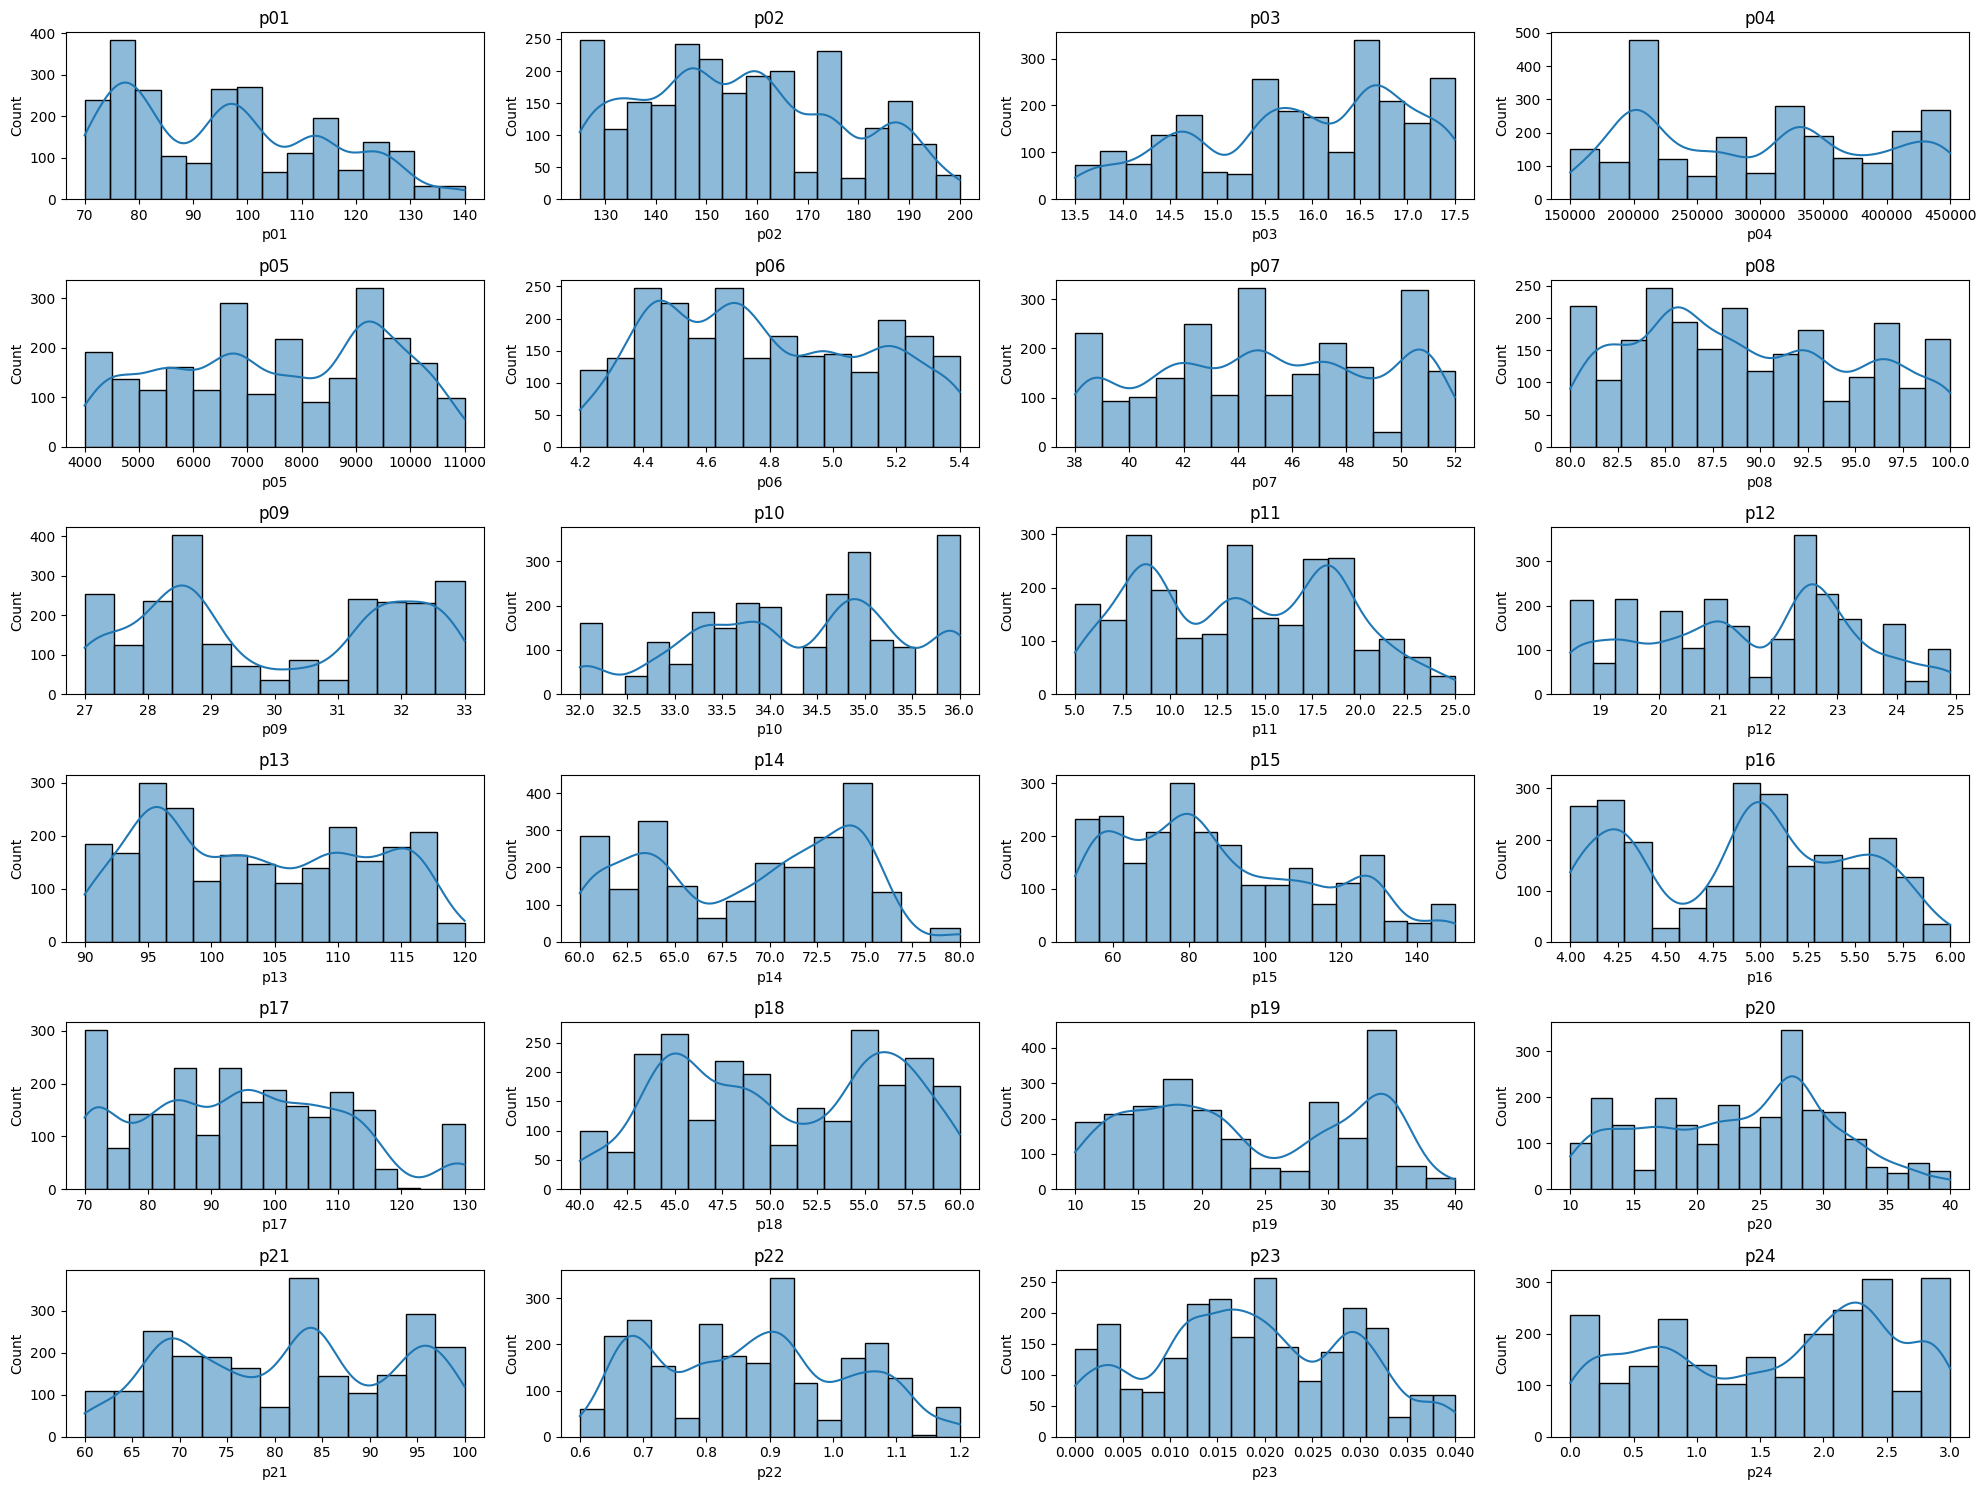

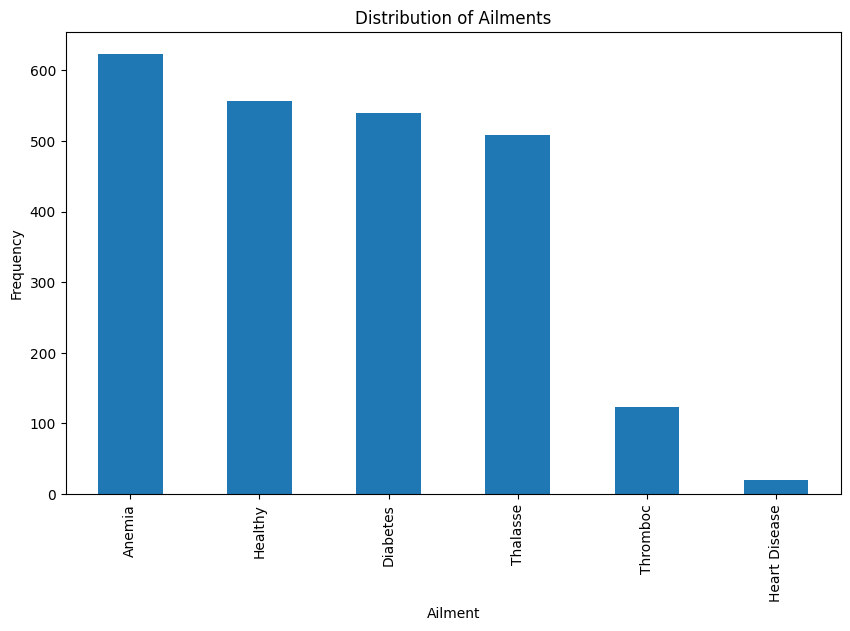

In [134]:
import seaborn as sns
data=pd.read_csv('patient-data.csv')
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate([f'p{i:02d}' for i in range(1, 25)]):
    ax = axes[i]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

# Plot the distribution of ailments
data['Ailment'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Ailment')
plt.ylabel('Frequency')
plt.title('Distribution of Ailments')
plt.show()

As we can see that Thrombic and Heart dieases are quite low which caan result in undersampling an causing the model to give high accuracy despite not classifing them properly

In [135]:
from sklearn.utils import resample
# Assume 'data' is your loaded DataFrame
print("Before balancing:")
print(data['Ailment'].value_counts())

# Determine the target count based on the majority class
target_count = data['Ailment'].value_counts().max()

dfs = []

# Iterate over each unique class in 'Ailment'
for label in data['Ailment'].unique():
    # Copy the entire subset (all columns including p01 to p24) and reset index
    df_label = data[data['Ailment'] == label].copy().reset_index(drop=True)
    
    # Check if this subset is empty to avoid errors
    if df_label.empty:
        print(f"Warning: No samples found for label '{label}'. Skipping this class.")
        continue

    # If the class count is less than the target, oversample with replacement
    if len(df_label) < target_count:
        df_label_upsampled = resample(df_label,
                                      replace=True,      # sample with replacement
                                      n_samples=target_count,
                                      random_state=42)
        # Reset the index of the upsampled DataFrame
        df_label_upsampled = df_label_upsampled.reset_index(drop=True)
        dfs.append(df_label_upsampled)
    else:
        dfs.append(df_label)

# Combine all the balanced subsets into one DataFrame; ignore original indices
df_balanced = pd.concat(dfs, ignore_index=True)

# Verify new class distribution
print("\nAfter balancing:")
print(df_balanced['Ailment'].value_counts())
print(df_balanced)

Before balancing:
Ailment
Anemia           623
Healthy          556
Diabetes         539
Thalasse         508
Thromboc         123
Heart Disease     20
Name: count, dtype: int64

After balancing:
Ailment
Healthy          623
Diabetes         623
Thalasse         623
Anemia           623
Thromboc         623
Heart Disease    623
Name: count, dtype: int64
             p01         p02        p03          p04           p05       p06  \
0     113.029041  172.881629  14.958661  207732.6362   7732.385000  5.310724   
1      77.018491  147.249542  16.656206  340300.2106   9775.748293  4.467648   
2      77.018491  147.249542  16.656206  340300.2106   9775.748293  4.467648   
3     116.872606  164.147364  15.927436  275486.4845  10652.095240  5.400000   
4      72.307976  128.624518  14.264936  317997.7472   6761.229637  5.177727   
...          ...         ...        ...          ...           ...       ...   
3733   80.569216  149.241881  14.266113  368342.2035  10047.556840  5.091450   
3734

The issue of undersampling is solved by adding copies of the data needed

Below we have just encoded the labels for simplicity with it following the order 0 being Anmenia to 5 being heart disease 

In [136]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_balanced['Ailment'] = label_encoder.fit_transform(df_balanced['Ailment'])

In [137]:
X = df_balanced[[f"p{i:02d}" for i in range(1, 25)]]
Y = df_balanced['Ailment']
print(X)
print(Y)


             p01         p02        p03          p04           p05       p06  \
0     113.029041  172.881629  14.958661  207732.6362   7732.385000  5.310724   
1      77.018491  147.249542  16.656206  340300.2106   9775.748293  4.467648   
2      77.018491  147.249542  16.656206  340300.2106   9775.748293  4.467648   
3     116.872606  164.147364  15.927436  275486.4845  10652.095240  5.400000   
4      72.307976  128.624518  14.264936  317997.7472   6761.229637  5.177727   
...          ...         ...        ...          ...           ...       ...   
3733   80.569216  149.241881  14.266113  368342.2035  10047.556840  5.091450   
3734   75.673268  148.400574  16.861712  371089.7664   7145.707927  4.606055   
3735  108.016951  182.912739  16.066708  326544.7423   8674.199631  4.448244   
3736  108.016951  182.912739  16.066708  326544.7423   8674.199631  4.448244   
3737   80.569216  149.241881  14.266113  368342.2035  10047.556840  5.091450   

            p07        p08        p09  

### Missing values
There might be some missing values so this is to find which column contains hown many missing values. Note the cpy hadn't copied any row that had an Nan value.

In [138]:
print(X.isnull().sum()) 


p01    0
p02    0
p03    1
p04    1
p05    1
p06    1
p07    1
p08    1
p09    1
p10    1
p11    1
p12    1
p13    1
p14    1
p15    2
p16    2
p17    1
p18    1
p19    1
p20    1
p21    1
p22    1
p23    0
p24    0
dtype: int64


I beilive that here replacing Nan with mode is best here.

In [139]:
X.fillna(X.mode().iloc[0], inplace=True)  # Uses the mode (most frequent value)


C:\Users\swaya\AppData\Local\Temp\ipykernel_14128\92057553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mode().iloc[0], inplace=True)  # Uses the mode (most frequent value)


In [140]:
print(X.isnull().sum()) 

p01    0
p02    0
p03    0
p04    0
p05    0
p06    0
p07    0
p08    0
p09    0
p10    0
p11    0
p12    0
p13    0
p14    0
p15    0
p16    0
p17    0
p18    0
p19    0
p20    0
p21    0
p22    0
p23    0
p24    0
dtype: int64


### Outliers
There might be outlier so this is to find them.

C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float

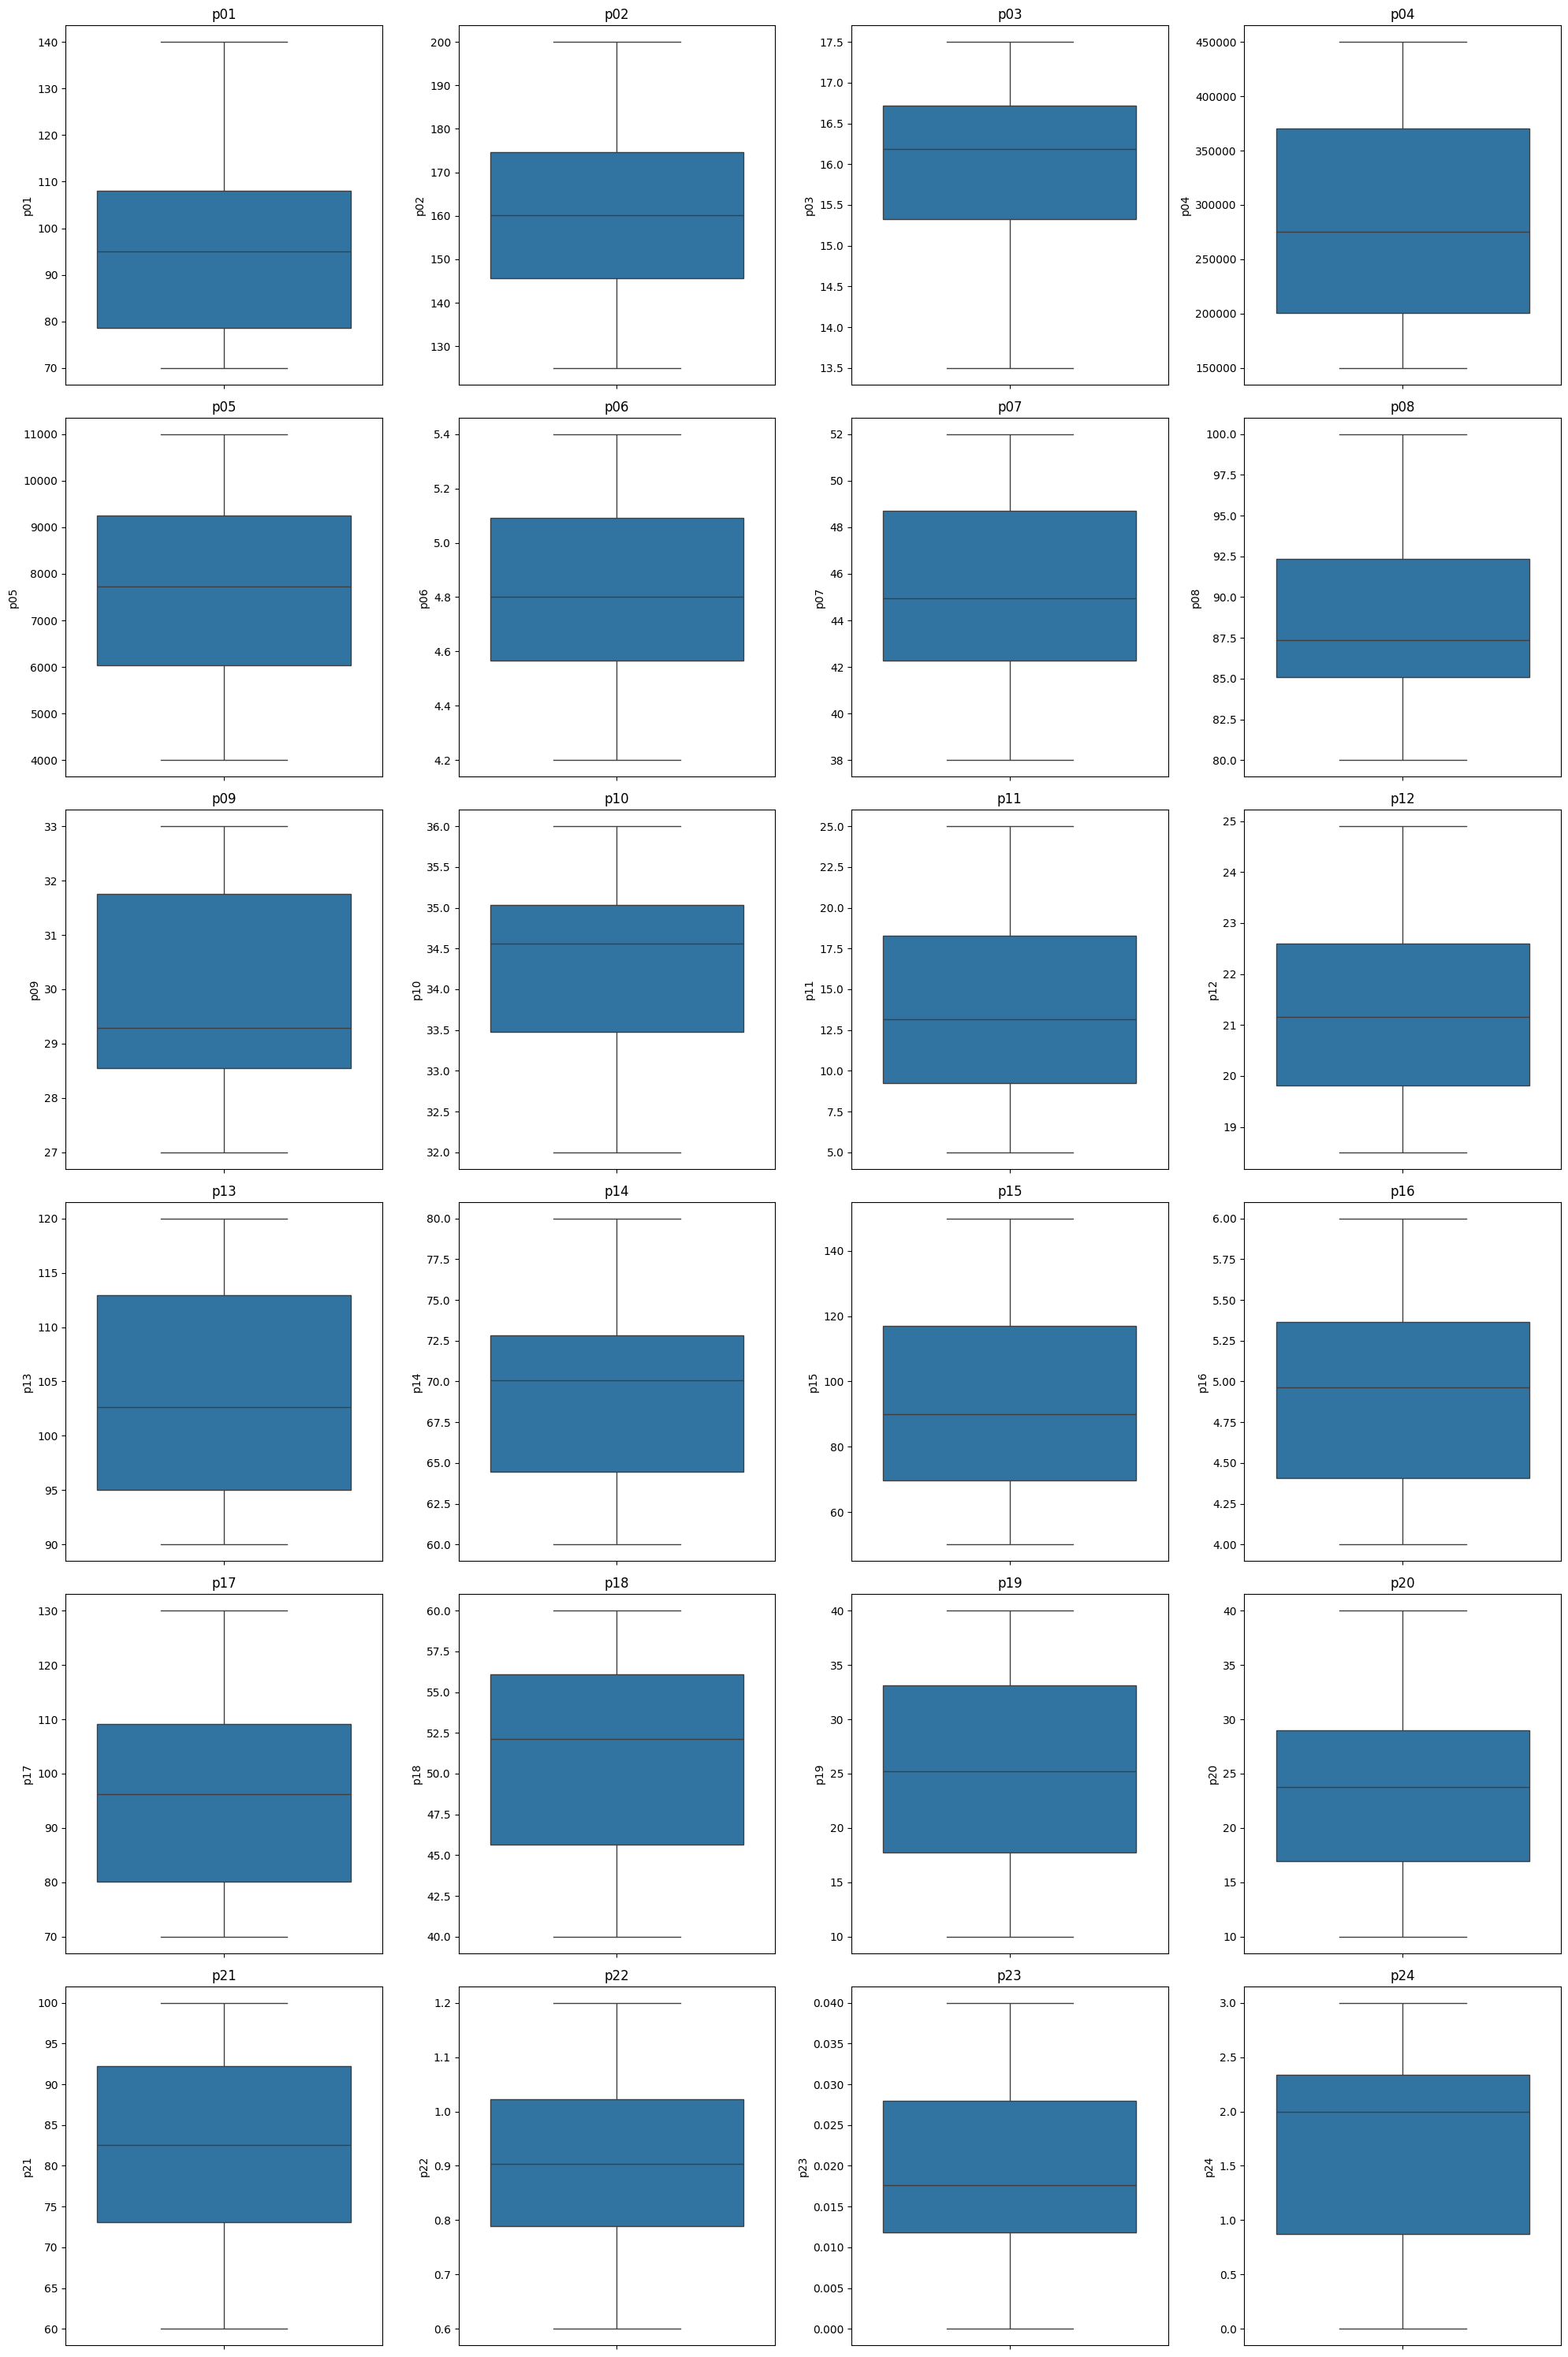

p01: 0 outliers
p02: 0 outliers
p03: 0 outliers
p04: 0 outliers
p05: 0 outliers
p06: 0 outliers
p07: 0 outliers
p08: 0 outliers
p09: 0 outliers
p10: 0 outliers
p11: 0 outliers
p12: 0 outliers
p13: 0 outliers
p14: 0 outliers
p15: 0 outliers
p16: 0 outliers
p17: 0 outliers
p18: 0 outliers
p19: 0 outliers
p20: 0 outliers
p21: 0 outliers
p22: 0 outliers
p23: 0 outliers
p24: 0 outliers


In [141]:
import seaborn as sns

plt.figure(figsize=(20, 30))
for i, col in enumerate(X.columns, 1):
    plt.subplot(6, 4, i)  # 6 rows, 4 columns
    sns.boxplot(y=X[col])
    plt.title(col)
    plt.tight_layout()
plt.show()
# Calculate the number of outliers in each column
outliers = {}
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((X[col] < lower_bound) | (X[col] > upper_bound)).sum()

# Print the number of outliers in each column
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

### Correlation
Just to check if there is any correlation and if we could reduce the dimentionality

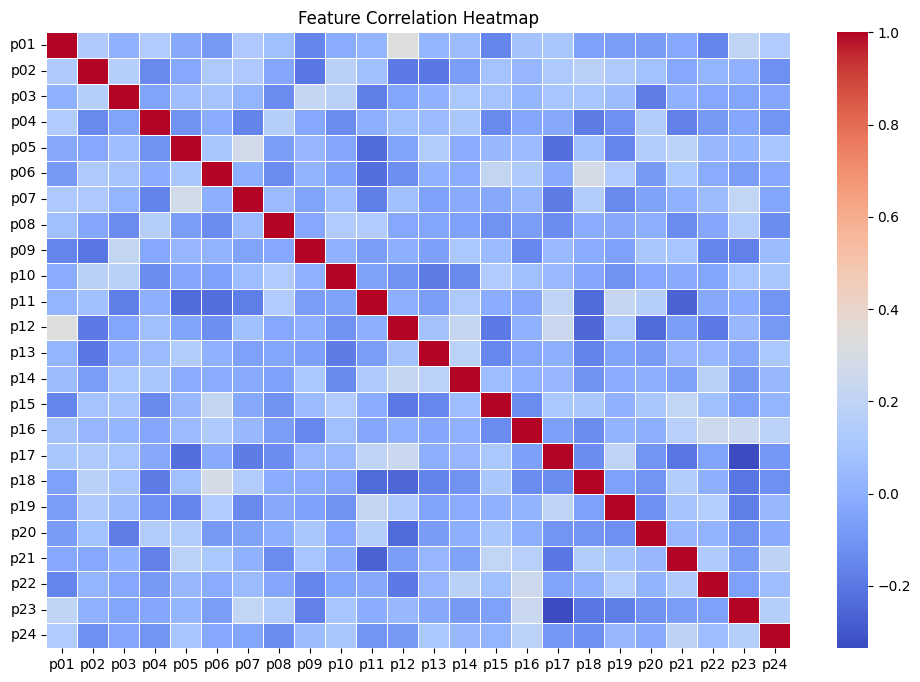

Top 10 correlations:
p12  p01    0.328257
p06  p18    0.288578
p05  p07    0.270876
p16  p22    0.252318
p23  p16    0.239592
p17  p12    0.234300
p14  p12    0.225094
p11  p19    0.223856
p09  p03    0.214558
p06  p15    0.212365
dtype: float64


In [142]:
# Compute correlation matrix
corr_matrix = X[[f"p{i:02d}" for i in range(1, 25)]].corr()

# Plot heatmap without annotations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Get the top 10 correlations
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
top_10_corr = corr_pairs[corr_pairs != 1].drop_duplicates().head(10)
print("Top 10 correlations:")
print(top_10_corr)

The correlations aren't quite high

## Checking some models

In [143]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X,Y)



SVC()

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# For SVC with rbf Kernel
y_pred_linear = svc_rbf.predict(X)
accuracy_linear = accuracy_score(Y, y_pred_linear)
precisions = precision_score(Y, y_pred_linear, average=None)
precision_linear_micro = precision_score(Y, y_pred_linear, average="micro")
precision_linear_macro = precision_score(Y, y_pred_linear, average="macro")
precision_linear_w = precision_score(Y, y_pred_linear, average="weighted")
recalls= recall_score(Y, y_pred_linear, average=None)
recall_linear_micro = recall_score(Y, y_pred_linear, average="micro")
recall_linear_macro = recall_score(Y, y_pred_linear, average="macro")
recall_linear_w = recall_score(Y, y_pred_linear, average="weighted")
f1s= f1_score(Y, y_pred_linear, average=None)
f1_linear_micro = f1_score(Y, y_pred_linear, average="micro")
f1_linear_macro = f1_score(Y, y_pred_linear, average="macro")
f1_linear_w = f1_score(Y, y_pred_linear, average="weighted")

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Precision': [precisions[0], precisions[1], precisions[2], precisions[3], precisions[4], precisions[5], precision_linear_micro, precision_linear_macro, precision_linear_w],
    'Recall': [recalls[0], recalls[1], recalls[2], recalls[3], recalls[4], recalls[5], recall_linear_micro, recall_linear_macro, recall_linear_w],
    'F1 Score': [f1s[0], f1s[1], f1s[2], f1s[3], f1s[4], f1s[5], f1_linear_micro, f1_linear_macro, f1_linear_w]
}, index=['0', '1', '2', '3', '4', '5', 'micro', 'macro', 'weighted'])

print("Classification Report for SVC with Rbf Kernel:")
print("Accuracy:", accuracy_linear)
print(metrics_df)

Classification Report for SVC with Rbf Kernel:
Accuracy: 0.3657035848047084
          Precision    Recall  F1 Score
0          0.385659  0.319422  0.349429
1          0.000000  0.000000  0.000000
2          0.329870  0.611557  0.428571
3          0.378753  0.263242  0.310606
4          0.000000  0.000000  0.000000
5          0.492880  1.000000  0.660307
micro      0.365704  0.365704  0.365704
macro      0.264527  0.365704  0.291486
weighted   0.264527  0.365704  0.291486


In [145]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define the parameter grid
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]

# Initialize a list to store the results
results = []

# Iterate over the parameter grid
for C in C_values:
    for gamma in gamma_values:
        # Initialize the SVC with RBF kernel
        svc_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
        
        # Fit the classifier on the training data
        svc_rbf.fit(X, Y)
        
        # Predict on the training data
        y_pred = svc_rbf.predict(X)
        
        # Calculate metrics
        accuracy = accuracy_score(Y, y_pred)
        precisions = precision_score(Y, y_pred, average=None)
        precision_micro = precision_score(Y, y_pred, average="micro")
        precision_macro = precision_score(Y, y_pred, average="macro")
        precision_w = precision_score(Y, y_pred, average="weighted")
        recalls = recall_score(Y, y_pred, average=None)
        recall_micro = recall_score(Y, y_pred, average="micro")
        recall_macro = recall_score(Y, y_pred, average="macro")
        recall_w = recall_score(Y, y_pred, average="weighted")
        f1s = f1_score(Y, y_pred, average=None)
        f1_micro = f1_score(Y, y_pred, average="micro")
        f1_macro = f1_score(Y, y_pred, average="macro")
        f1_w = f1_score(Y, y_pred, average="weighted")
        
        # Store the results
        results.append({
            'C': C,
            'gamma': gamma,
            'Accuracy': accuracy,
            'Precision (micro)': precision_micro,
            'Precision (macro)': precision_macro,
            'Precision (weighted)': precision_w,
            'Recall (micro)': recall_micro,
            'Recall (macro)': recall_macro,
            'Recall (weighted)': recall_w,
            'F1 Score (micro)': f1_micro,
            'F1 Score (macro)': f1_macro,
            'F1 Score (weighted)': f1_w
        })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

      C  gamma  Accuracy  Precision (micro)  Precision (macro)  \
0   0.1   0.01  0.999465           0.999465           0.999467   
1   0.1   0.10  0.999465           0.999465           0.999467   
2   0.1   1.00  0.999465           0.999465           0.999467   
3   1.0   0.01  1.000000           1.000000           1.000000   
4   1.0   0.10  1.000000           1.000000           1.000000   
5   1.0   1.00  1.000000           1.000000           1.000000   
6  10.0   0.01  1.000000           1.000000           1.000000   
7  10.0   0.10  1.000000           1.000000           1.000000   
8  10.0   1.00  1.000000           1.000000           1.000000   

   Precision (weighted)  Recall (micro)  Recall (macro)  Recall (weighted)  \
0              0.999467        0.999465        0.999465           0.999465   
1              0.999467        0.999465        0.999465           0.999465   
2              0.999467        0.999465        0.999465           0.999465   
3              1.000000    

In [146]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
dt_classifier.fit(X, Y)

# Predict on the training data
y_pred_dt = dt_classifier.predict(X)

# Calculate metrics
accuracy_dt = accuracy_score(Y, y_pred_dt)
precisions_dt = precision_score(Y, y_pred_dt, average=None)
precision_dt_micro = precision_score(Y, y_pred_dt, average="micro")
precision_dt_macro = precision_score(Y, y_pred_dt, average="macro")
precision_dt_w = precision_score(Y, y_pred_dt, average="weighted")
recalls_dt = recall_score(Y, y_pred_dt, average=None)
recall_dt_micro = recall_score(Y, y_pred_dt, average="micro")
recall_dt_macro = recall_score(Y, y_pred_dt, average="macro")
recall_dt_w = recall_score(Y, y_pred_dt, average="weighted")
f1s_dt = f1_score(Y, y_pred_dt, average=None)
f1_dt_micro = f1_score(Y, y_pred_dt, average="micro")
f1_dt_macro = f1_score(Y, y_pred_dt, average="macro")
f1_dt_w = f1_score(Y, y_pred_dt, average="weighted")

# Create a DataFrame to store the metrics
metrics_dt_df = pd.DataFrame({
    'Precision': [precisions_dt[0], precisions_dt[1], precisions_dt[2], precisions_dt[3], precisions_dt[4], precisions_dt[5], precision_dt_micro, precision_dt_macro, precision_dt_w],
    'Recall': [recalls_dt[0], recalls_dt[1], recalls_dt[2], recalls_dt[3], recalls_dt[4], recalls_dt[5], recall_dt_micro, recall_dt_macro, recall_dt_w],
    'F1 Score': [f1s_dt[0], f1s_dt[1], f1s_dt[2], f1s_dt[3], f1s_dt[4], f1s_dt[5], f1_dt_micro, f1_dt_macro, f1_dt_w]
}, index=['0', '1', '2', '3', '4', '5', 'micro', 'macro', 'weighted'])

print("Classification Report for Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print(metrics_dt_df)

Classification Report for Decision Tree Classifier:
Accuracy: 1.0
          Precision  Recall  F1 Score
0               1.0     1.0       1.0
1               1.0     1.0       1.0
2               1.0     1.0       1.0
3               1.0     1.0       1.0
4               1.0     1.0       1.0
5               1.0     1.0       1.0
micro           1.0     1.0       1.0
macro           1.0     1.0       1.0
weighted        1.0     1.0       1.0


In [147]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(min_samples_split=5, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X, Y)

# Predict on the training data
y_pred_rf = rf_classifier.predict(X)

# Calculate metrics
accuracy_rf = accuracy_score(Y, y_pred_rf)
precisions_rf = precision_score(Y, y_pred_rf, average=None)
precision_rf_micro = precision_score(Y, y_pred_rf, average="micro")
precision_rf_macro = precision_score(Y, y_pred_rf, average="macro")
precision_rf_w = precision_score(Y, y_pred_rf, average="weighted")
recalls_rf = recall_score(Y, y_pred_rf, average=None)
recall_rf_micro = recall_score(Y, y_pred_rf, average="micro")
recall_rf_macro = recall_score(Y, y_pred_rf, average="macro")
recall_rf_w = recall_score(Y, y_pred_rf, average="weighted")
f1s_rf = f1_score(Y, y_pred_rf, average=None)
f1_rf_micro = f1_score(Y, y_pred_rf, average="micro")
f1_rf_macro = f1_score(Y, y_pred_rf, average="macro")
f1_rf_w = f1_score(Y, y_pred_rf, average="weighted")

# Create a DataFrame to store the metrics
metrics_rf_df = pd.DataFrame({
    'Precision': [precisions_rf[0], precisions_rf[1], precisions_rf[2], precisions_rf[3], precisions_rf[4], precisions_rf[5], precision_rf_micro, precision_rf_macro, precision_rf_w],
    'Recall': [recalls_rf[0], recalls_rf[1], recalls_rf[2], recalls_rf[3], recalls_rf[4], recalls_rf[5], recall_rf_micro, recall_rf_macro, recall_rf_w],
    'F1 Score': [f1s_rf[0], f1s_rf[1], f1s_rf[2], f1s_rf[3], f1s_rf[4], f1s_rf[5], f1_rf_micro, f1_rf_macro, f1_rf_w]
}, index=['0', '1', '2', '3', '4', '5', 'micro', 'macro', 'weighted'])

print("Classification Report for Random Forest Classifier with min_samples_split=5:")
print("Accuracy:", accuracy_rf)
print(metrics_rf_df)

Classification Report for Random Forest Classifier with min_samples_split=5:
Accuracy: 1.0
          Precision  Recall  F1 Score
0               1.0     1.0       1.0
1               1.0     1.0       1.0
2               1.0     1.0       1.0
3               1.0     1.0       1.0
4               1.0     1.0       1.0
5               1.0     1.0       1.0
micro           1.0     1.0       1.0
macro           1.0     1.0       1.0
weighted        1.0     1.0       1.0


In [148]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier with hidden layer sizes (5, 5)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)

# Fit the classifier on the training data
mlp_classifier.fit(X, Y)

# Predict on the training data
y_pred_mlp = mlp_classifier.predict(X)

# Calculate metrics
accuracy_mlp = accuracy_score(Y, y_pred_mlp)
precisions_mlp = precision_score(Y, y_pred_mlp, average=None)
precision_mlp_micro = precision_score(Y, y_pred_mlp, average="micro")
precision_mlp_macro = precision_score(Y, y_pred_mlp, average="macro")
precision_mlp_w = precision_score(Y, y_pred_mlp, average="weighted")
recalls_mlp = recall_score(Y, y_pred_mlp, average=None)
recall_mlp_micro = recall_score(Y, y_pred_mlp, average="micro")
recall_mlp_macro = recall_score(Y, y_pred_mlp, average="macro")
recall_mlp_w = recall_score(Y, y_pred_mlp, average="weighted")
f1s_mlp = f1_score(Y, y_pred_mlp, average=None)
f1_mlp_micro = f1_score(Y, y_pred_mlp, average="micro")
f1_mlp_macro = f1_score(Y, y_pred_mlp, average="macro")
f1_mlp_w = f1_score(Y, y_pred_mlp, average="weighted")

# Create a DataFrame to store the metrics
metrics_mlp_df = pd.DataFrame({
    'Precision': [precisions_mlp[0], precisions_mlp[1], precisions_mlp[2], precisions_mlp[3], precisions_mlp[4], precisions_mlp[5], precision_mlp_micro, precision_mlp_macro, precision_mlp_w],
    'Recall': [recalls_mlp[0], recalls_mlp[1], recalls_mlp[2], recalls_mlp[3], recalls_mlp[4], recalls_mlp[5], recall_mlp_micro, recall_mlp_macro, recall_mlp_w],
    'F1 Score': [f1s_mlp[0], f1s_mlp[1], f1s_mlp[2], f1s_mlp[3], f1s_mlp[4], f1s_mlp[5], f1_mlp_micro, f1_mlp_macro, f1_mlp_w]
}, index=['0', '1', '2', '3', '4', '5', 'micro', 'macro', 'weighted'])

print("Classification Report for MLP Classifier with hidden layer sizes (5, 5):")
print("Accuracy:", accuracy_mlp)
print(metrics_mlp_df)

Classification Report for MLP Classifier with hidden layer sizes (5, 5):
Accuracy: 0.16666666666666666
          Precision    Recall  F1 Score
0          0.000000  0.000000  0.000000
1          0.166667  1.000000  0.285714
2          0.000000  0.000000  0.000000
3          0.000000  0.000000  0.000000
4          0.000000  0.000000  0.000000
5          0.000000  0.000000  0.000000
micro      0.166667  0.166667  0.166667
macro      0.027778  0.166667  0.047619
weighted   0.027778  0.166667  0.047619


C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: 

## Looking into the validation data

In [149]:
# Load validation data
validation_data = pd.read_csv("data-for-validation.csv")

# Basic info and summary statistics
print("Validation Data Info:")
print(validation_data.info())
print("\nSummary Statistics:")
print(validation_data.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(validation_data.isnull().sum())

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   p01      466 non-null    float64
 1   p02      466 non-null    float64
 2   p03      466 non-null    float64
 3   p04      466 non-null    float64
 4   p05      466 non-null    float64
 5   p06      466 non-null    float64
 6   p07      466 non-null    float64
 7   p08      466 non-null    float64
 8   p09      466 non-null    float64
 9   p10      466 non-null    float64
 10  p11      466 non-null    float64
 11  p12      466 non-null    float64
 12  p13      466 non-null    float64
 13  p14      466 non-null    float64
 14  p15      466 non-null    float64
 15  p16      466 non-null    float64
 16  p17      466 non-null    float64
 17  p18      466 non-null    float64
 18  p19      466 non-null    float64
 19  p20      466 non-null    float64
 20  p21      466 non-null    float64

There are no missing values

so let cross check it with the initial data

C:\Users\swaya\AppData\Local\Temp\ipykernel_14128\253297346.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], label="Training", shade=True, bw_adjust=0.5, ax=ax)
C:\Users\swaya\AppData\Local\Temp\ipykernel_14128\253297346.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(validation_data[feature], label="Validation", shade=True, bw_adjust=0.5, ax=ax)
C:\Users\swaya\AppData\Local\Temp\ipykernel_14128\253297346.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], label="Training", shade=True, bw_adjust=0.5, ax=ax)
C:\Users\swaya\AppData\Local\Temp\ipykernel_14128\253297346.py:14: FutureWa

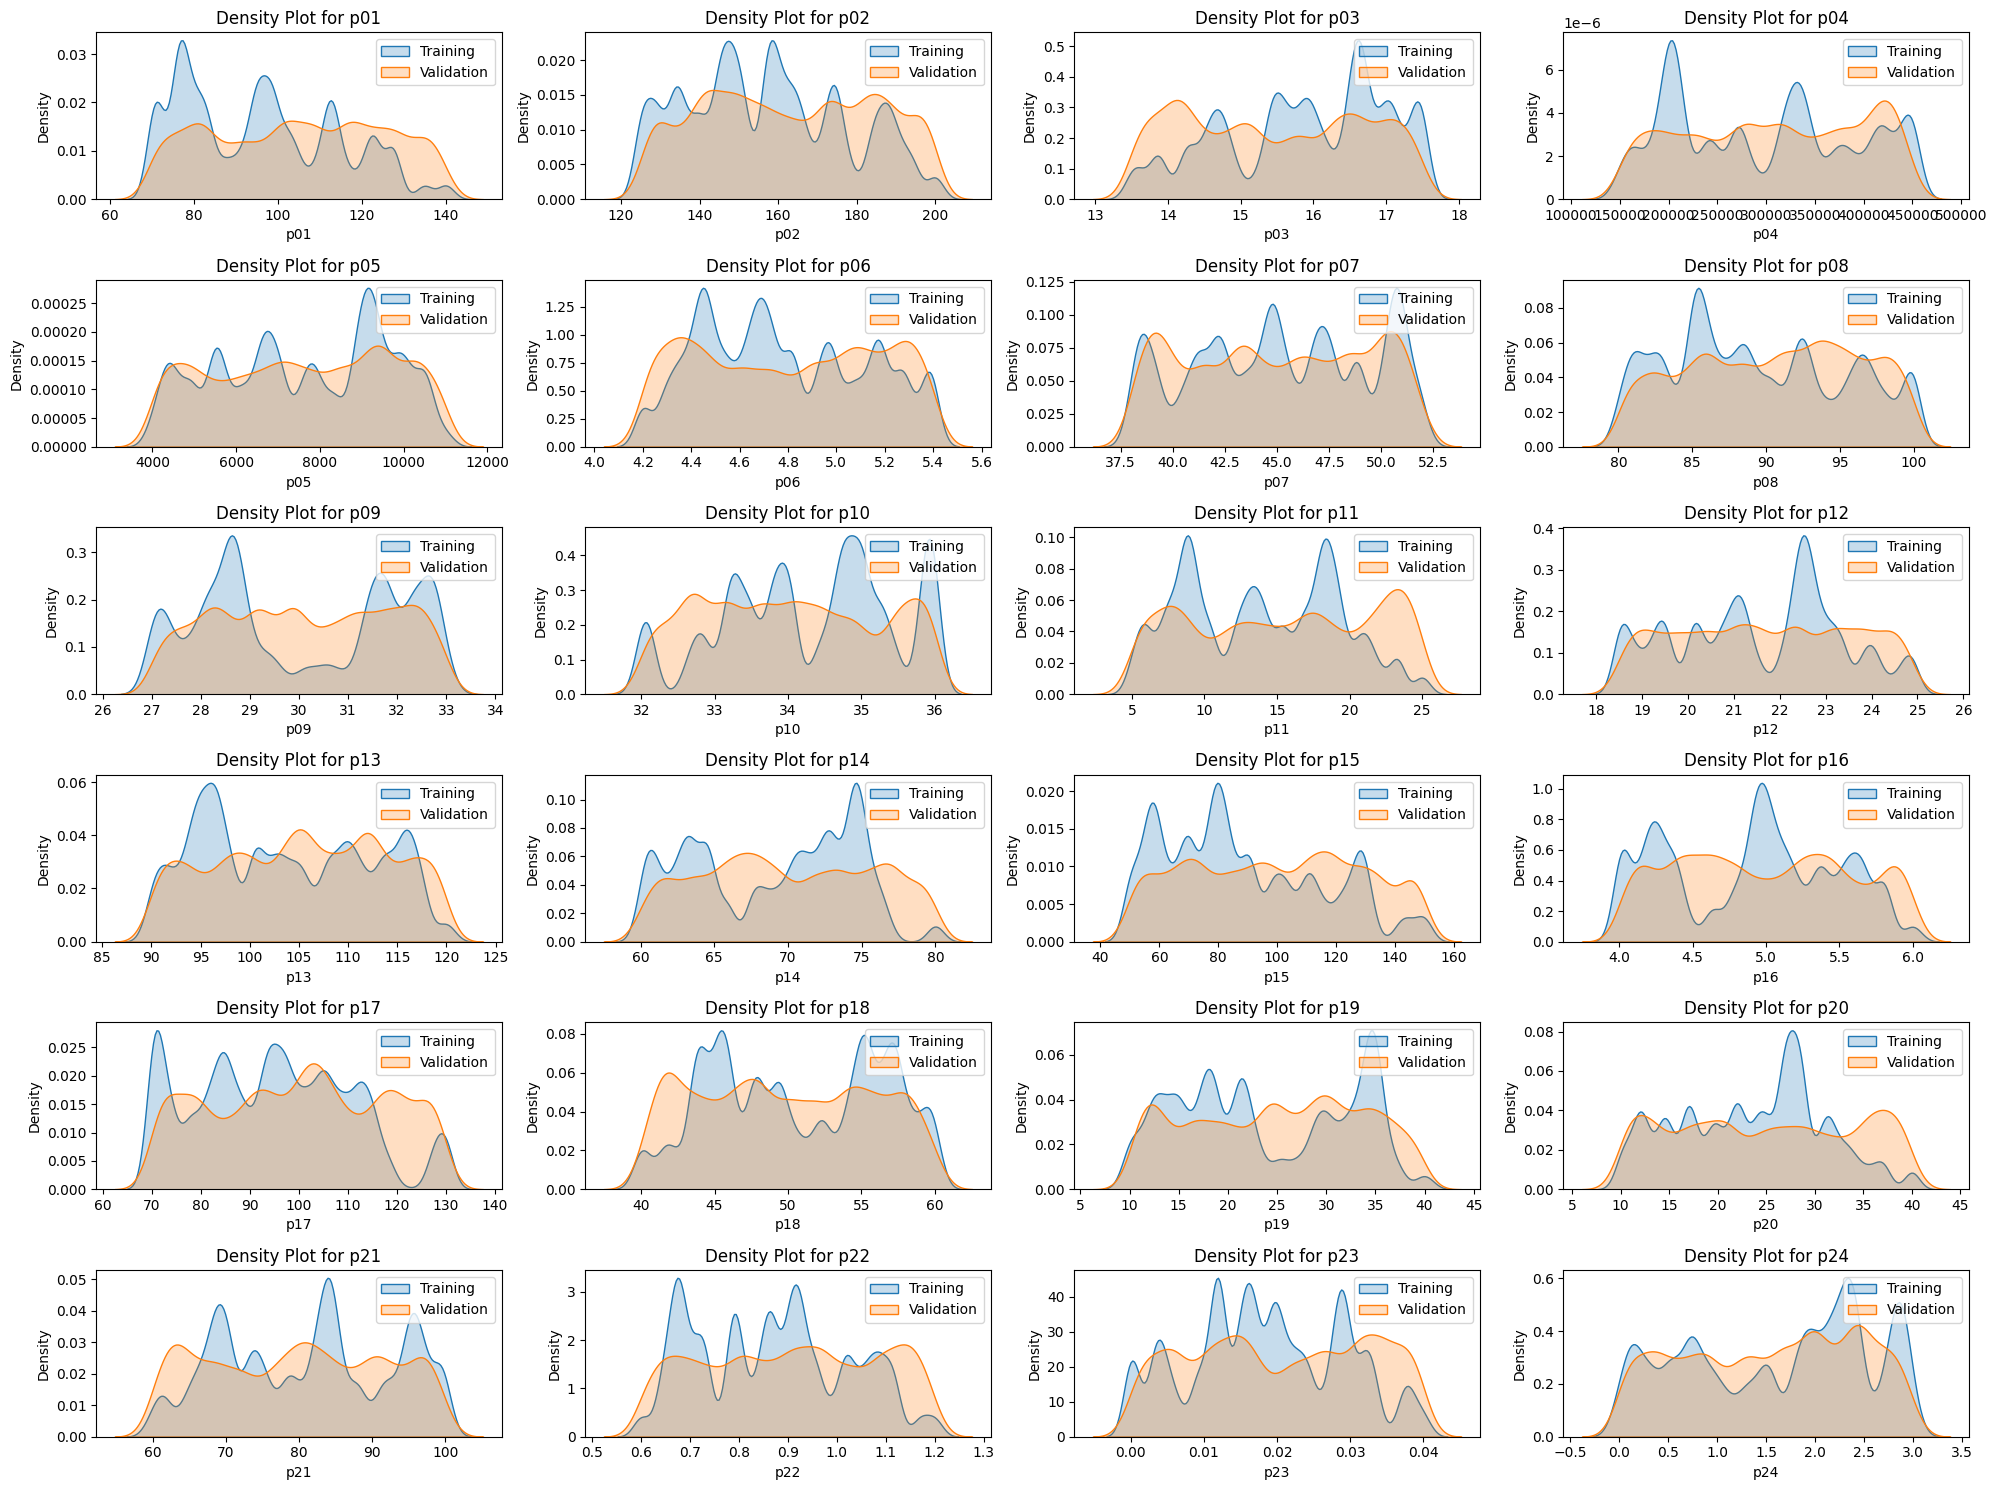

In [150]:
# List of features to compare (p01 to p24)
features = [f"p{i:02d}" for i in range(1, 25)]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Compare distributions for a few features; loop through selected features
for i, feature in enumerate(features):
    ax = axes[i]
    # Plot KDE for training data
    sns.kdeplot(data[feature], label="Training", shade=True, bw_adjust=0.5, ax=ax)
    # Plot KDE for validation data
    sns.kdeplot(validation_data[feature], label="Validation", shade=True, bw_adjust=0.5, ax=ax)
    ax.set_title(f"Density Plot for {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [151]:
# Frequency of ailments in the original data
print("Frequency of Ailments in the Original Data:")
original_ailment_counts = data['Ailment'].value_counts()
original_ailment_percentages = (original_ailment_counts / len(data)) * 100
print(pd.DataFrame({'Count': original_ailment_counts, 'Percentage': original_ailment_percentages}))

# Frequency of ailments in the validation data
print("\nFrequency of Ailments in the Validation Data:")
validation_ailment_counts = validation_data['Ailment'].value_counts()
validation_ailment_percentages = (validation_ailment_counts / len(validation_data)) * 100
print(pd.DataFrame({'Count': validation_ailment_counts, 'Percentage': validation_ailment_percentages}))

Frequency of Ailments in the Original Data:
               Count  Percentage
Ailment                         
Anemia           623   26.275833
Healthy          556   23.450021
Diabetes         539   22.733024
Thalasse         508   21.425559
Thromboc         123    5.187685
Heart Disease     20    0.843526

Frequency of Ailments in the Validation Data:
               Count  Percentage
Ailment                         
Diabetes         294   63.090129
Anemia            84   18.025751
Thalasse          48   10.300429
Heart Disease     19    4.077253
Thromboc          16    3.433476
Healthy            5    1.072961


The density of the validation data are much flatter that the initial one which can result in a bad with with the models that we use earlier. And the labels too is dominated by Diabeties here which was not the case with our initial data. 

This can tell use that the same model won't work well in the validation data.

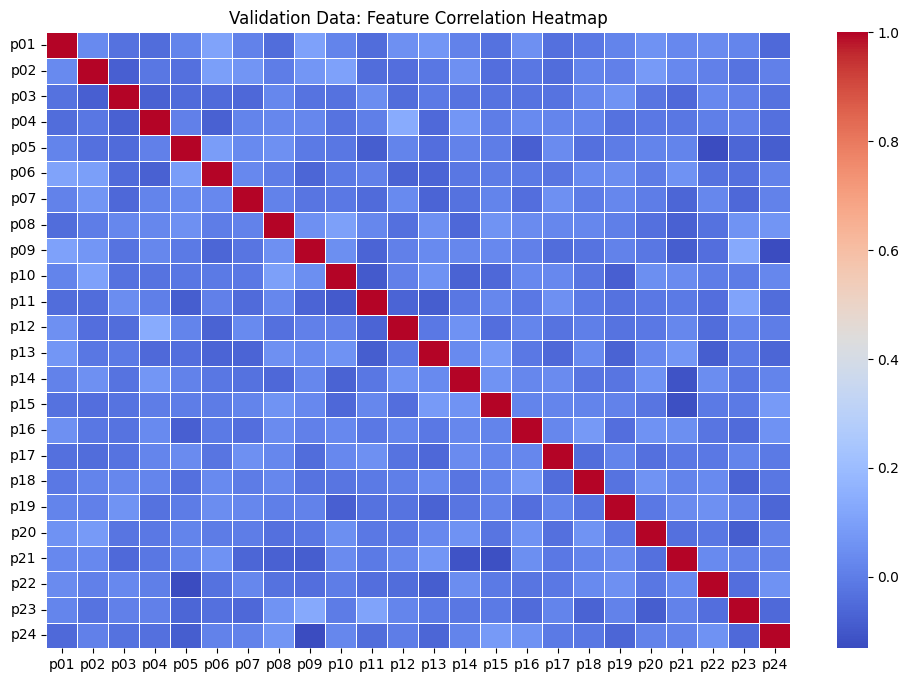

Top 10 correlations in validation data:
p12  p04    0.137937
p09  p23    0.133739
p11  p23    0.111167
p06  p01    0.109517
p09  p01    0.106873
p02  p10    0.106301
p08  p10    0.102732
p06  p02    0.094809
     p05    0.093474
p20  p02    0.085212
dtype: float64


In [152]:
# Correlation matrix for validation data (using p01 to p24)
corr_matrix_val = validation_data[features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_val, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Validation Data: Feature Correlation Heatmap")
plt.show()

# Get the top 10 correlations
corr_pairs_val = corr_matrix_val.unstack().sort_values(kind="quicksort", ascending=False)
top_10_corr_val = corr_pairs_val[corr_pairs_val != 1].drop_duplicates().head(10)
print("Top 10 correlations in validation data:")
print(top_10_corr_val)


The same trend of not being a similar kind of data is also shown here.